<a href="https://colab.research.google.com/github/Mounikapaili/Mounika/blob/main/Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/TA Aadhya1.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df['hours']=df['duration'].astype(int)
df['minutes']=((df['duration']-df['hours'])*60).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  hours             300153 non-null  int64  
 12  minutes           300153 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 29.8+ MB


In [ ]:
#eda
#null
#duplicates
#outliers

In [ ]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,hours,minutes
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2,10
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2,19
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2,10
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2,15
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,10,4
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,10,25
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,13,49
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,10,0


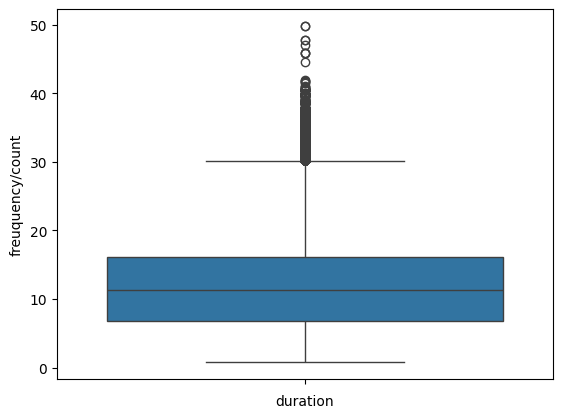

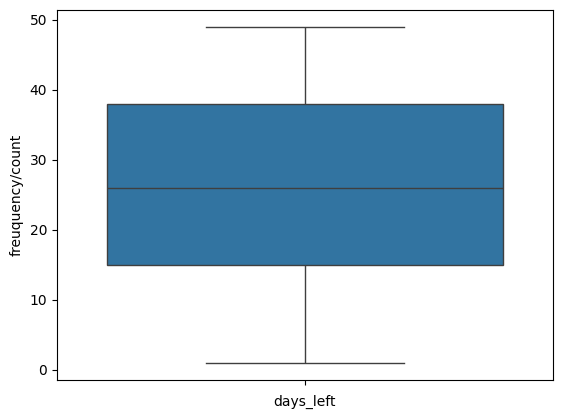

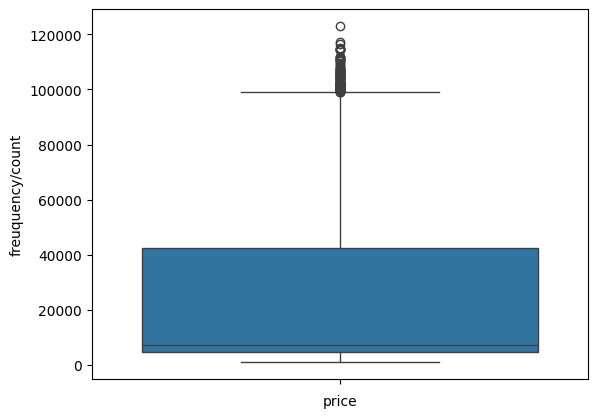

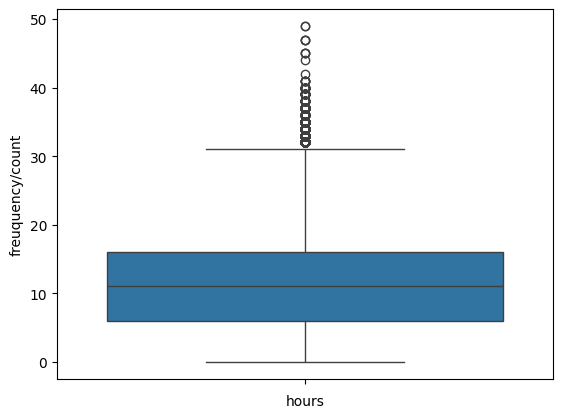

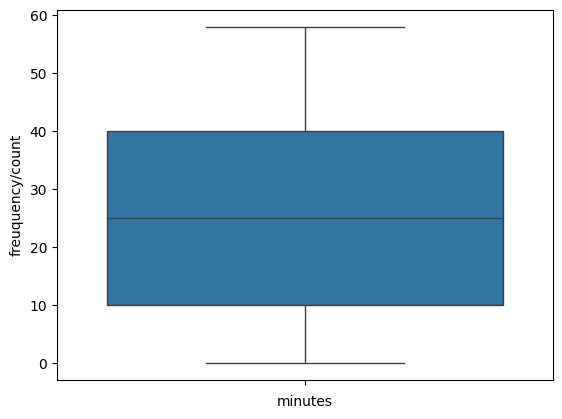

In [ ]:
for i in df.columns:
  if df[i].dtypes=="int" or df[i].dtypes=="float":
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("freuquency/count")
    plt.show()

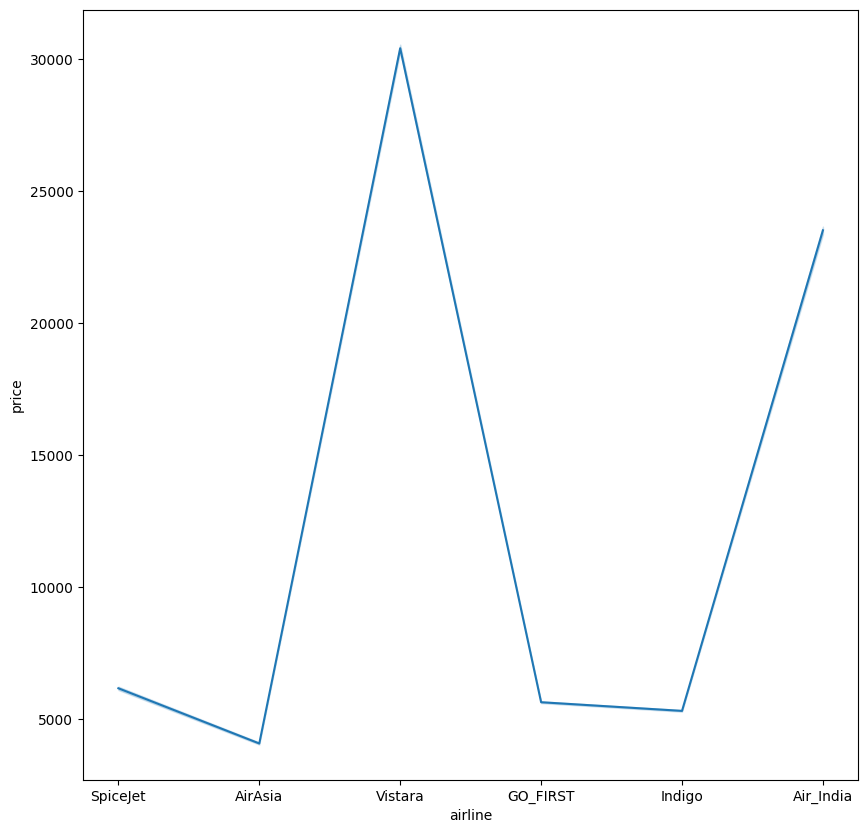

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='airline',y='price')
plt.show()

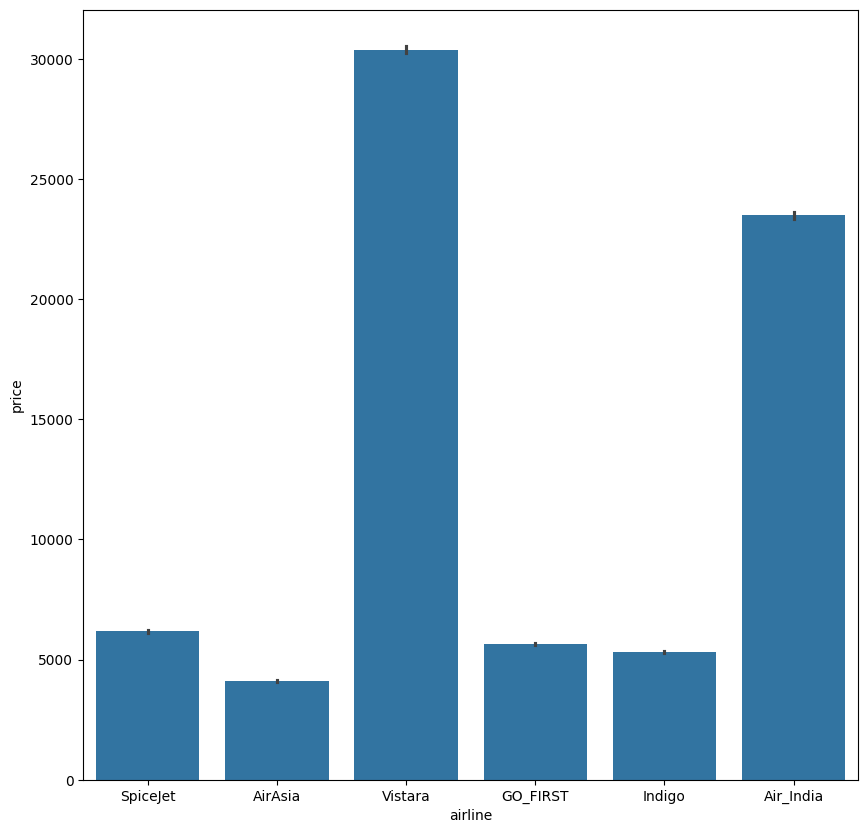

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='airline',y='price')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  if df[i].dtypes=="object":
    df[i]=le.fit_transform(df[i])

In [ ]:
df.corr()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,hours,minutes
airline,1.000000,0.637918,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862,-0.001651,-0.010678,0.243358,0.000124,-0.044323
flight,0.637918,1.000000,-0.009443,0.071564,-0.118833,0.067175,-0.036248,-0.259531,0.205502,-0.000443,0.305872,0.206722,-0.034933
source_city,-0.028350,-0.009443,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075,0.008619,-0.003568,0.004594,0.008708,-0.002437
departure_time,0.056885,0.071564,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340,0.084348,-0.001597,0.058319,0.085069,-0.019539
stops,-0.029838,-0.118833,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262,-0.473860,-0.007047,-0.202620,-0.473510,0.001966
arrival_time,0.037714,0.067175,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647,0.008679,-0.004191,0.042043,0.008570,0.002527
destination_city,-0.030172,-0.036248,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603,0.001736,-0.005323,0.004795,0.001994,-0.007197
class,-0.178862,-0.259531,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000,-0.138710,0.013039,-0.937860,-0.139375,0.019683
duration,-0.001651,0.205502,0.008619,0.084348,-0.473860,0.008679,0.001736,-0.138710,1.000000,-0.039157,0.204222,0.999191,-0.002152
days_left,-0.010678,-0.000443,-0.003568,-0.001597,-0.007047,-0.004191,-0.005323,0.013039,-0.039157,1.000000,-0.091949,-0.039206,0.002045


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  hours             300153 non-null  int64  
 12  minutes           300153 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 29.8 MB


In [ ]:
df.drop(columns=['duration'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   airline           300153 non-null  int64
 1   flight            300153 non-null  int64
 2   source_city       300153 non-null  int64
 3   departure_time    300153 non-null  int64
 4   stops             300153 non-null  int64
 5   arrival_time      300153 non-null  int64
 6   destination_city  300153 non-null  int64
 7   class             300153 non-null  int64
 8   days_left         300153 non-null  int64
 9   price             300153 non-null  int64
 10  hours             300153 non-null  int64
 11  minutes           300153 non-null  int64
dtypes: int64(12)
memory usage: 27.5 MB


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
col_list=[]
for i in df.columns:
  if ((df[i].dtype !='object')& (i !='price')):
    col_list.append(i)
x=df[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,airline,6.701874
1,flight,12.767778
2,source_city,2.995032
3,departure_time,2.812034
4,stops,1.444730
5,arrival_time,3.816673
6,destination_city,2.948443
7,class,2.909610
8,days_left,4.121353
9,hours,4.555054


In [ ]:
#models
x=df.drop(columns=['price','flight'])
y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
#model---1
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import *
r2=r2_score(y_test,y_pred)
mae =mean_absolute_error(y_test,y_pred)
mape =mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(r2)
print(mae)
print(mape)
print(rmse)

0.9045755374024218
4624.144472321057
0.43506600151927816
7013.5311315975105


In [ ]:
# model--2
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [ ]:
from sklearn.metrics import *

r2 = r2_score(y_test,y_pred)
mae =mean_absolute_error(y_test,y_pred)
mape =mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(r2)
print(mae)
print(mape)
print(mse)
print(rmse)

0.9767867422303498
1133.840401903461
0.07227971693162412
11966022.892039577
3459.1939656572563


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

y_pred

array([ 6110.87, 67310.4 ,  6197.63, ...,  6493.68,  4415.54, 69359.51])

In [ ]:
from sklearn.metrics import *

r2 = r2_score(y_test,y_pred)
mae =mean_absolute_error(y_test,y_pred)
mape =mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(r2)
print(mae)
print(mape)
print(mse)
print(rmse)

0.985501582115096
1066.069446743521
0.06941310369601306
7473677.414461911
2733.8027387618718


<ipython-input-35-09671df1b0db>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test , label ="ACtual")
<ipython-input-35-09671df1b0db>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label ="predicted")


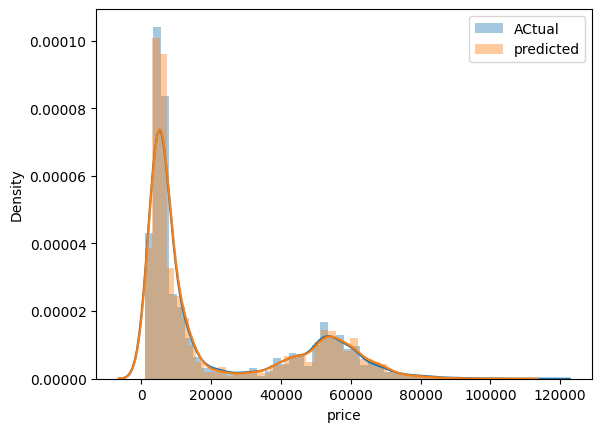

In [ ]:
sns.distplot(y_test , label ="ACtual")
sns.distplot(y_pred, label ="predicted")
plt.legend()